In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import miceforest as mf

# Auser aquifer

In [2]:
df = pd.read_csv('../../data/raw/aquifer/auser.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [3]:
print(df.shape)
df.head()

(8154, 27)


,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

In [5]:
df.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

In [6]:
# date of first non-null value, by feature
for x in df.columns:
    print(x, '...', pd.Timestamp(df[~df[x].isnull()]['Date'].values[0]).strftime('%D'))

Date ... 03/05/98
Rainfall_Gallicano ... 01/01/06
Rainfall_Pontetetto ... 01/01/06
Rainfall_Monte_Serra ... 01/01/06
Rainfall_Orentano ... 01/01/06
Rainfall_Borgo_a_Mozzano ... 01/01/06
Rainfall_Piaggione ... 01/01/06
Rainfall_Calavorno ... 01/01/06
Rainfall_Croce_Arcana ... 01/01/06
Rainfall_Tereglio_Coreglia_Antelminelli ... 01/01/06
Rainfall_Fabbriche_di_Vallico ... 01/01/06
Depth_to_Groundwater_LT2 ... 01/01/06
Depth_to_Groundwater_SAL ... 04/06/07
Depth_to_Groundwater_PAG ... 01/01/09
Depth_to_Groundwater_CoS ... 06/29/06
Depth_to_Groundwater_DIEC ... 01/02/11
Temperature_Orentano ... 03/05/98
Temperature_Monte_Serra ... 03/05/98
Temperature_Ponte_a_Moriano ... 03/05/98
Temperature_Lucca_Orto_Botanico ... 03/05/98
Volume_POL ... 01/01/05
Volume_CC1 ... 01/01/05
Volume_CC2 ... 01/01/05
Volume_CSA ... 01/01/05
Volume_CSAL ... 01/01/05
Hydrometry_Monte_S_Quirico ... 01/01/00
Hydrometry_Piaggione ... 01/01/00


In [7]:
df2 = df[df['Date'] > datetime(1999, 12, 31)]

In [8]:
df2.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2192
Rainfall_Pontetetto                        2192
Rainfall_Monte_Serra                       2198
Rainfall_Orentano                          2192
Rainfall_Borgo_a_Mozzano                   2192
Rainfall_Piaggione                         2557
Rainfall_Calavorno                         2192
Rainfall_Croce_Arcana                      2192
Rainfall_Tereglio_Coreglia_Antelminelli    2192
Rainfall_Fabbriche_di_Vallico              2192
Depth_to_Groundwater_LT2                   2685
Depth_to_Groundwater_SAL                   2942
Depth_to_Groundwater_PAG                   3680
Depth_to_Groundwater_CoS                   3172
Depth_to_Groundwater_DIEC                  4217
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

In [9]:
# get a list of all dates with null values, with
# consecutive days collapsed into a list; like this:
# [
#     '1/1/2000',
#     '1/5/2000-2/1/2000',
#     ...
# ]

def ts_success(a, b):
    return (b - a).days == 1

def date_of_null(s):
    r = []
    curr = None
    for d in s:
        try:
            pd.Timestamp(d).strftime('%D')
        except TypeError:
            print(d)
            continue
        if d is None:
            continue
        if curr is None:
            curr = [d]
        else:
            last = curr[-1]
            if ts_success(pd.Timestamp(last), pd.Timestamp(d)):
                curr.append(d)
            else:
                r.append(curr)
                curr = [d]
    r.append(curr)
    if len(r) == 1 and r[0] is None:
        return []
    for x in r:
        try:
            pd.Timestamp(x[0]).strftime('%D')
        except TypeError:
            print(r)
    r = [[pd.Timestamp(d[0]).strftime('%D'), pd.Timestamp(d[-1]).strftime('%D')] for d in r]
    r = [d if d[0] != d[1] else [d[0]] for d in r]
    r = [d[0] if len(d) == 1 else f"{d[0]}—{d[1]}" for d in r]
    return r

def find_null_dates(df, col, date_col='Date'):
    return date_of_null(df[df[col].isnull()][date_col].values)

In [10]:
for c in df2.columns:
    print(c)
    for d in find_null_dates(df2, c):
        print('\t', d)
    print()

Date

Rainfall_Gallicano
	 01/01/00—12/31/05

Rainfall_Pontetetto
	 01/01/00—12/31/05

Rainfall_Monte_Serra
	 01/01/00—12/31/05
	 02/01/12
	 02/03/12—02/04/12
	 02/10/12—02/11/12
	 02/15/12

Rainfall_Orentano
	 01/01/00—12/31/05

Rainfall_Borgo_a_Mozzano
	 01/01/00—12/31/05

Rainfall_Piaggione
	 01/01/00—12/31/05
	 01/01/09—12/31/09

Rainfall_Calavorno
	 01/01/00—12/31/05

Rainfall_Croce_Arcana
	 01/01/00—12/31/05

Rainfall_Tereglio_Coreglia_Antelminelli
	 01/01/00—12/31/05

Rainfall_Fabbriche_di_Vallico
	 01/01/00—12/31/05

Depth_to_Groundwater_LT2
	 01/01/00—12/31/05
	 11/18/07
	 12/25/09—12/31/09
	 12/24/10—12/31/10
	 02/10/11—05/16/11
	 02/03/12—02/04/12
	 02/21/12—05/28/12
	 07/04/12—08/08/12
	 10/23/14—11/19/14
	 08/19/15—08/20/15
	 12/20/15
	 01/20/16—01/28/16
	 01/30/16—02/16/16
	 02/18/16—02/23/16
	 02/25/16—02/28/16
	 03/01/16—03/08/16
	 03/10/16—03/14/16
	 03/16/16—03/22/16
	 03/24/16—03/28/16
	 03/31/16—04/05/16
	 04/07/16—04/11/16
	 04/13/16—04/20/16
	 04/22/16—04/27/16
	 

In [11]:
# Rainfall Features ::

# "JUST START AT 2006"
#   Gallicano
#   Pontetetto
#   Orentano
#   Borgo a Mozzano
#   Calavorno
#   Croce Arcana
#   Tereglio Coreglia Antelminelli
#   Fabbriche di Vallico

# "LITTLE EXTRA WORK"
#   Monte Serra: some missing days from 2/2012
#   Piaggione: all of 2009

In [12]:
# Volume Features ::

# "JUST START AT 2005"

In [13]:
# Hydrometry Features ::

# Monte S Quirico: Late 00, Late 08
# Piaggione: Late 00, 9/03, Early 05, Mid 05, Mid 07, Late 08-2010

In [14]:
# Depth to Groundwater Features ::

# PAG: Nothing until 09, Mid 11, Late 12, Late 13, Mid 14
# DIEC: Nothing until 11, Late 14, Late 18, Early 20

In [15]:
# Depth to Groundwater TARGETS ::

# LT2: Nothing until 06, Early 11, Early 12, Mid 12, Late 14, Early/Mid 16
# SAL: Nothing until 4/07, Mid 09, Late 16
# CoS: Nothing until 7/06, Late 07, Late 10/Early 11, Early 14, Mid 14, Early 15, Late 18

In [16]:
def pernullcent(s):
    return len(s[s.isnull()]) / len(s)

def getpernullcent(df):
    for c in df.columns:
        print(c, '...', pernullcent(df[c]))

getpernullcent(df2)

Date ... 0.0
Rainfall_Gallicano ... 0.29277414184586614
Rainfall_Pontetetto ... 0.29277414184586614
Rainfall_Monte_Serra ... 0.2935755309202618
Rainfall_Orentano ... 0.29277414184586614
Rainfall_Borgo_a_Mozzano ... 0.29277414184586614
Rainfall_Piaggione ... 0.34152531053826635
Rainfall_Calavorno ... 0.29277414184586614
Rainfall_Croce_Arcana ... 0.29277414184586614
Rainfall_Tereglio_Coreglia_Antelminelli ... 0.29277414184586614
Rainfall_Fabbriche_di_Vallico ... 0.29277414184586614
Depth_to_Groundwater_LT2 ... 0.3586216107920395
Depth_to_Groundwater_SAL ... 0.39294777614531856
Depth_to_Groundwater_PAG ... 0.4915186322959797
Depth_to_Groundwater_CoS ... 0.42366769066381726
Depth_to_Groundwater_DIEC ... 0.5632429544543877
Temperature_Orentano ... 0.0
Temperature_Monte_Serra ... 0.0
Temperature_Ponte_a_Moriano ... 0.0
Temperature_Lucca_Orto_Botanico ... 0.0
Volume_POL ... 0.244022973153466
Volume_CC1 ... 0.244022973153466
Volume_CC2 ... 0.244022973153466
Volume_CSA ... 0.244022973153466
Vol

In [17]:
df3 = df[df['Date'] > datetime(2007, 4, 5)]
df3 = df3.drop(['Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG'], axis=1)
getpernullcent(df3)

Date ... 0.0
Rainfall_Gallicano ... 0.0
Rainfall_Pontetetto ... 0.0
Rainfall_Monte_Serra ... 0.0012409513960703205
Rainfall_Orentano ... 0.0
Rainfall_Borgo_a_Mozzano ... 0.0
Rainfall_Piaggione ... 0.07549120992761117
Rainfall_Calavorno ... 0.0
Rainfall_Croce_Arcana ... 0.0
Rainfall_Tereglio_Coreglia_Antelminelli ... 0.0
Rainfall_Fabbriche_di_Vallico ... 0.0
Depth_to_Groundwater_LT2 ... 0.10196483971044468
Depth_to_Groundwater_SAL ... 0.05997931747673216
Depth_to_Groundwater_CoS ... 0.1656670113753878
Temperature_Orentano ... 0.0
Temperature_Monte_Serra ... 0.0
Temperature_Ponte_a_Moriano ... 0.0
Temperature_Lucca_Orto_Botanico ... 0.0
Volume_POL ... 0.0
Volume_CC1 ... 0.0
Volume_CC2 ... 0.0
Volume_CSA ... 0.0
Volume_CSAL ... 0.0
Hydrometry_Monte_S_Quirico ... 0.018821096173733197
Hydrometry_Piaggione ... 0.20868665977249223


In [18]:
df4 = df3.drop('Hydrometry_Piaggione', axis=1)
df4.isnull().sum()

Date                                         0
Rainfall_Gallicano                           0
Rainfall_Pontetetto                          0
Rainfall_Monte_Serra                         6
Rainfall_Orentano                            0
Rainfall_Borgo_a_Mozzano                     0
Rainfall_Piaggione                         365
Rainfall_Calavorno                           0
Rainfall_Croce_Arcana                        0
Rainfall_Tereglio_Coreglia_Antelminelli      0
Rainfall_Fabbriche_di_Vallico                0
Depth_to_Groundwater_LT2                   493
Depth_to_Groundwater_SAL                   290
Depth_to_Groundwater_CoS                   801
Temperature_Orentano                         0
Temperature_Monte_Serra                      0
Temperature_Ponte_a_Moriano                  0
Temperature_Lucca_Orto_Botanico              0
Volume_POL                                   0
Volume_CC1                                   0
Volume_CC2                                   0
Volume_CSA   

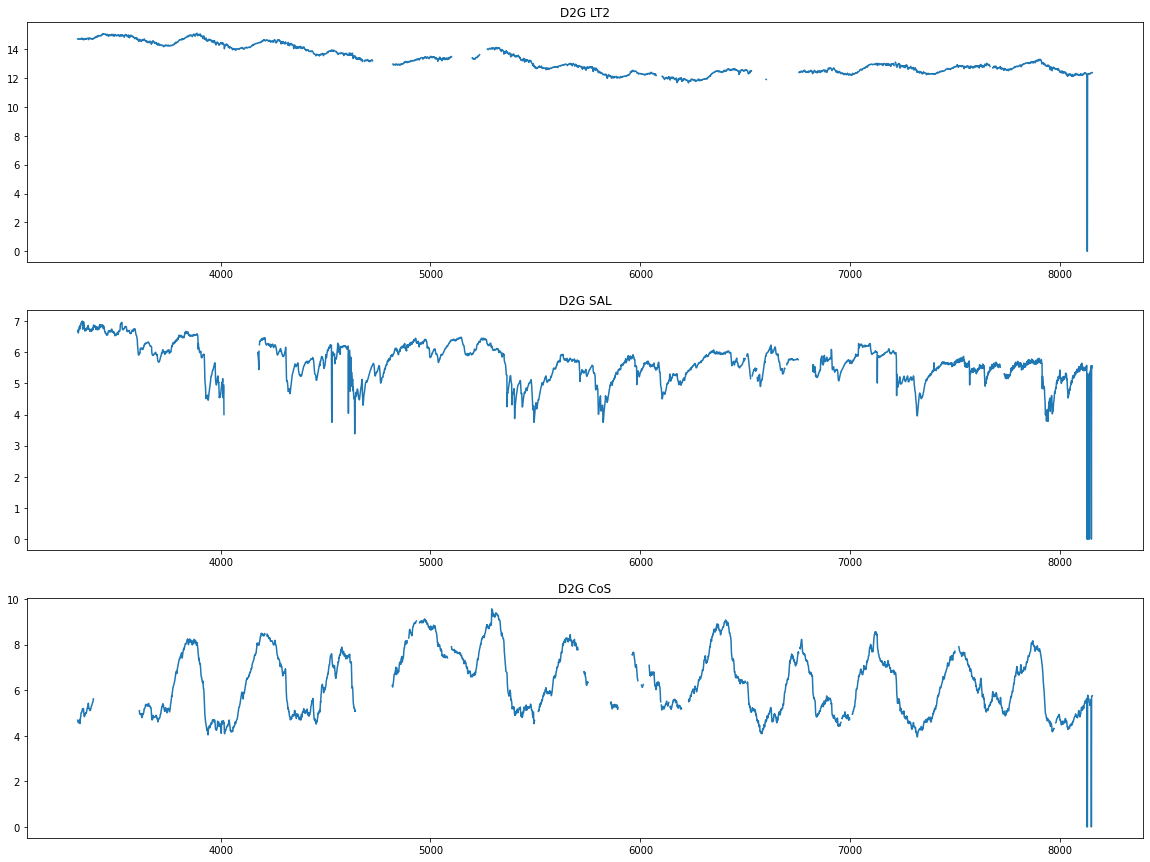

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(20,15))
axs[0].plot(df4['Depth_to_Groundwater_LT2'].abs())
axs[0].set_title('D2G LT2')
axs[1].plot(df4['Depth_to_Groundwater_SAL'].abs())
axs[1].set_title('D2G SAL')
axs[2].plot(df4['Depth_to_Groundwater_CoS'].abs())
axs[2].set_title('D2G CoS')
plt.show()

In [20]:
# some of these columns clearly have 0 for null
#(auser['Depth_to_Groundwater_LT2'] == 0).sum() // 2
#(auser['Depth_to_Groundwater_SAL'] == 0).sum()  // 10
#(auser['Depth_to_Groundwater_CoS'] == 0).sum()  // 4

In [21]:
df4['Depth_to_Groundwater_LT2'] = df4['Depth_to_Groundwater_LT2'].replace(0, float('nan'))
df4['Depth_to_Groundwater_SAL'] = df4['Depth_to_Groundwater_SAL'].replace(0, float('nan'))
df4['Depth_to_Groundwater_CoS'] = df4['Depth_to_Groundwater_CoS'].replace(0, float('nan'))

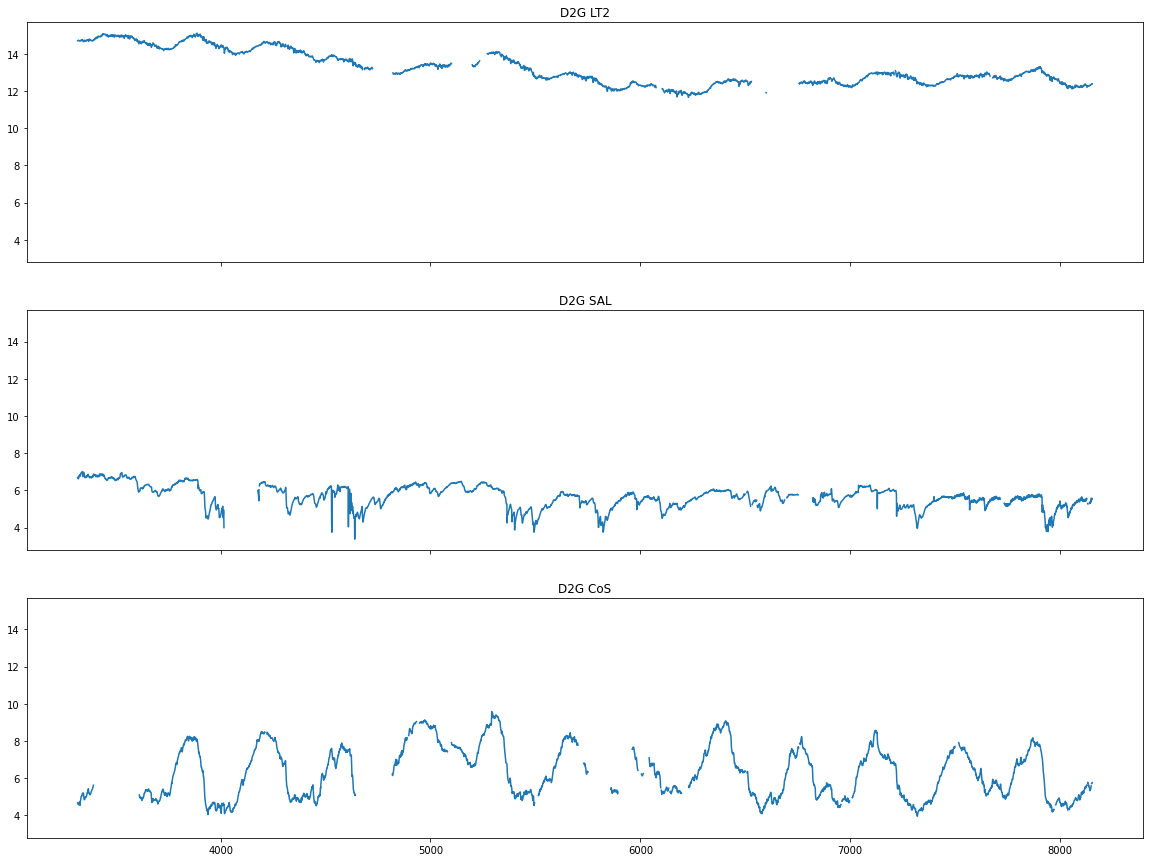

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(20,15), sharex=True, sharey=True)
axs[0].plot(df4['Depth_to_Groundwater_LT2'].abs())
axs[0].set_title('D2G LT2')
axs[1].plot(df4['Depth_to_Groundwater_SAL'].abs())
axs[1].set_title('D2G SAL')
axs[2].plot(df4['Depth_to_Groundwater_CoS'].abs())
axs[2].set_title('D2G CoS')
plt.show()

In [23]:
kernel = mf.MultipleImputedKernel(
    data=df4.drop('Date', axis=1),
    save_all_iterations=True,
    random_state=143
)
kernel.mice(3, verbose=True)

Dataset 0
1  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
2  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
3  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
Dataset 1
1  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
2  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
3  | Rainfall_Monte_Serra | Rainfall_Piaggione | Depth_to_Groundwater_LT2 | Depth_to_Groundwater_SAL | Depth_to_Groundwater_CoS | Hydrometry_Monte_S_Quirico
Dataset 2
1  | Rainfall_Monte_Serra | 

In [24]:
df5 = kernel.impute_new_data(df4.drop('Date', axis=1)).complete_data(0)

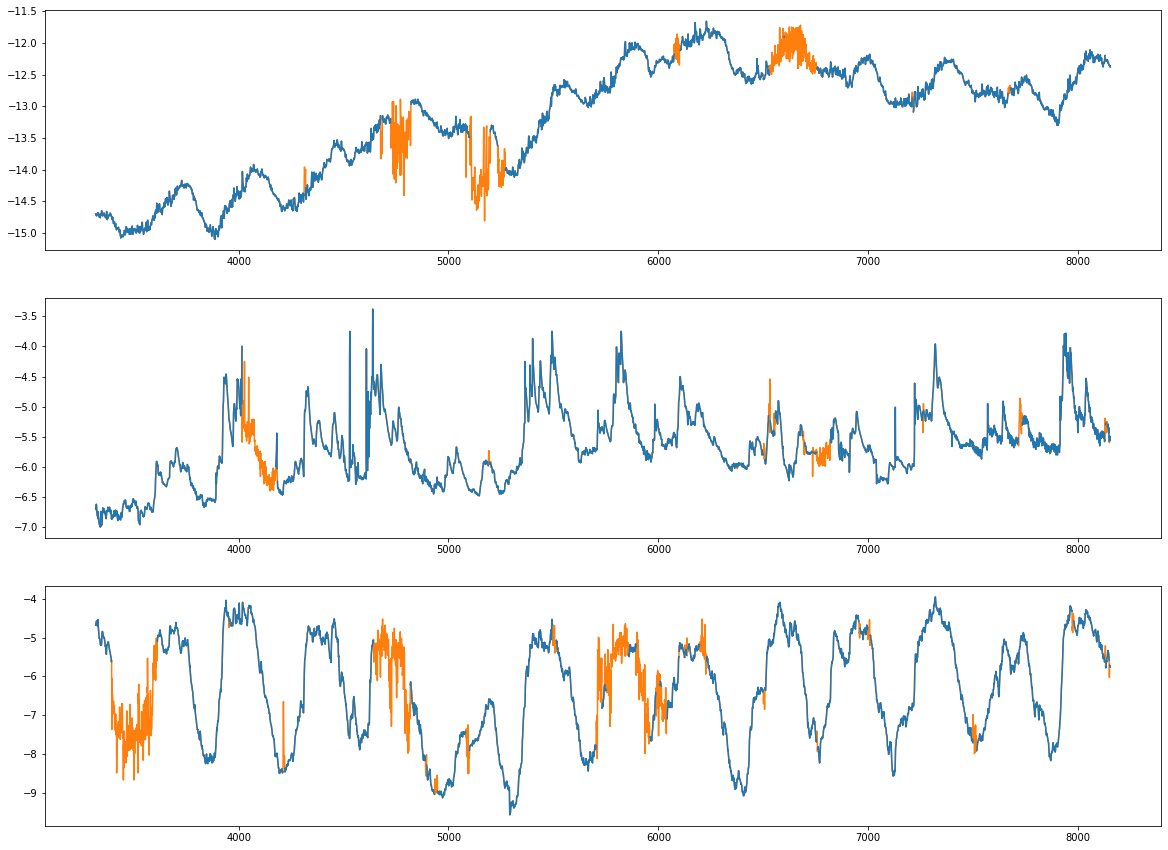

In [25]:
fig, axs = plt.subplots(3, 1, figsize=(20,15))
axs[0].plot(df5['Depth_to_Groundwater_LT2'], color='C1')
axs[0].plot(df4['Depth_to_Groundwater_LT2'], color='C0')
axs[1].plot(df5['Depth_to_Groundwater_SAL'], color='C1')
axs[1].plot(df4['Depth_to_Groundwater_SAL'], color='C0')
axs[2].plot(df5['Depth_to_Groundwater_CoS'], color='C1')
axs[2].plot(df4['Depth_to_Groundwater_CoS'], color='C0')
plt.show()

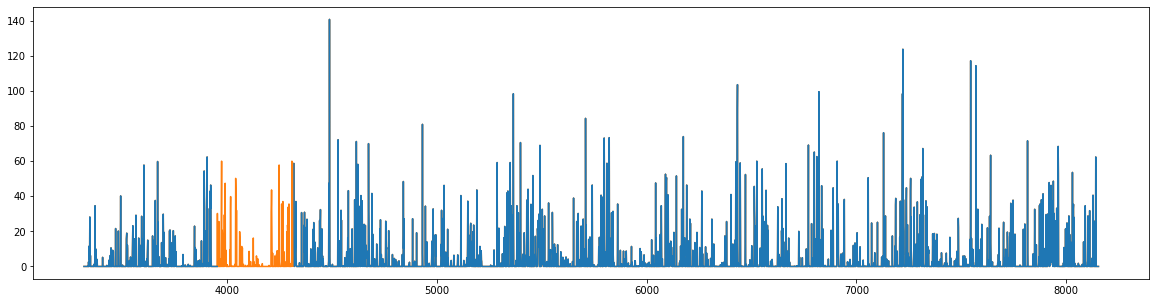

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.plot(df5['Rainfall_Piaggione'], color='C1')
ax.plot(df4['Rainfall_Piaggione'], color='C0')
plt.show()

![frightening](../../jclark.gif "maybe i am a monster")

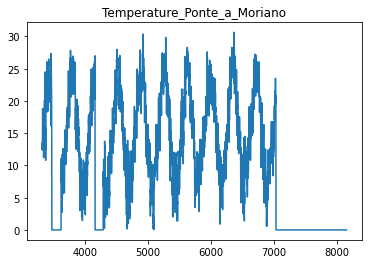

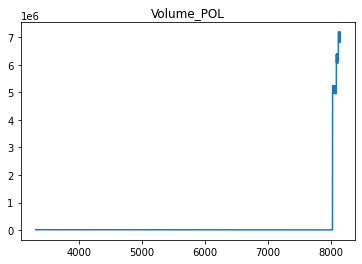

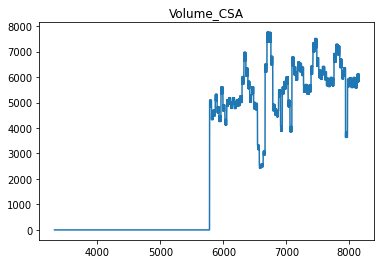

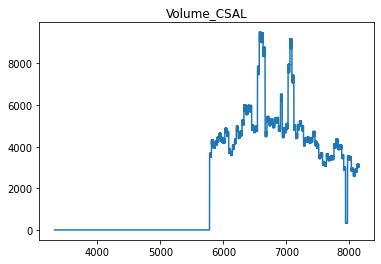

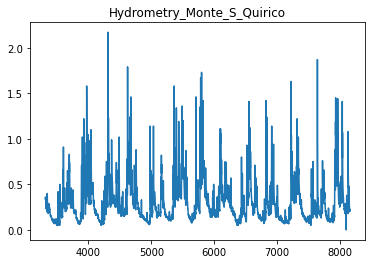

In [27]:
# search for "non-null" values that are actually null
for c in ['Temperature_Ponte_a_Moriano', 'Volume_POL', 'Volume_CSA', 'Volume_CSAL', 'Hydrometry_Monte_S_Quirico']:
    plt.plot(df5[c].abs())
    plt.title(c)
    plt.show()

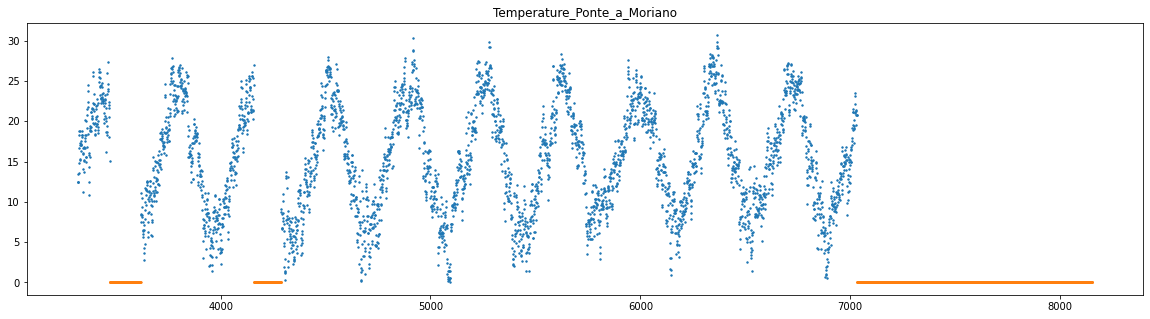

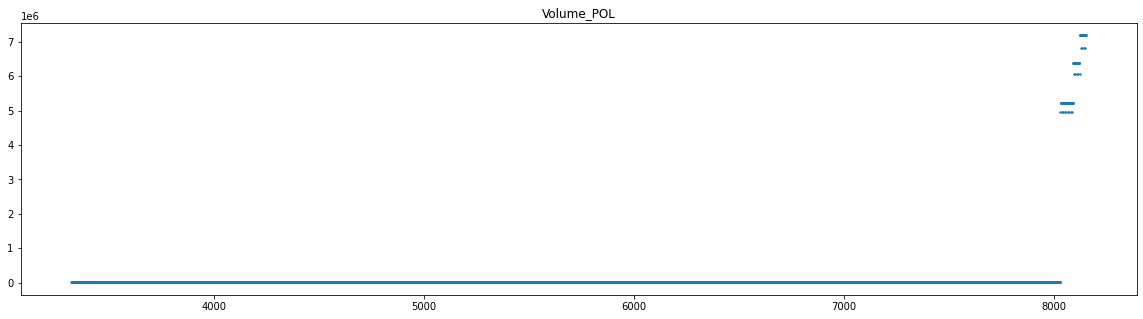

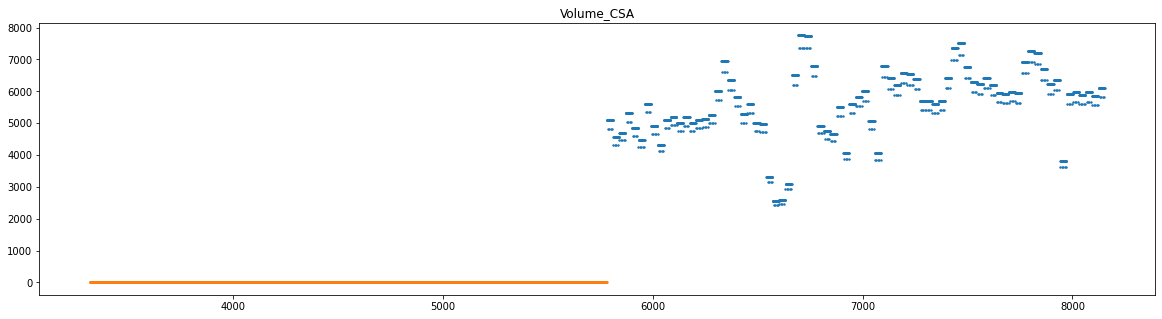

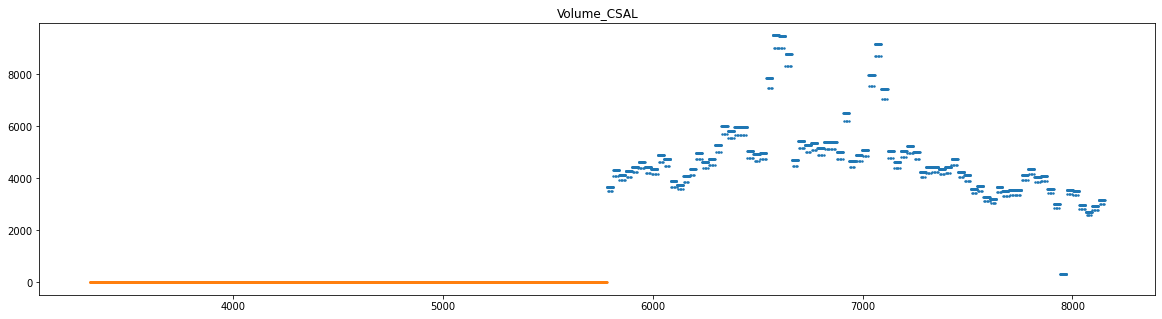

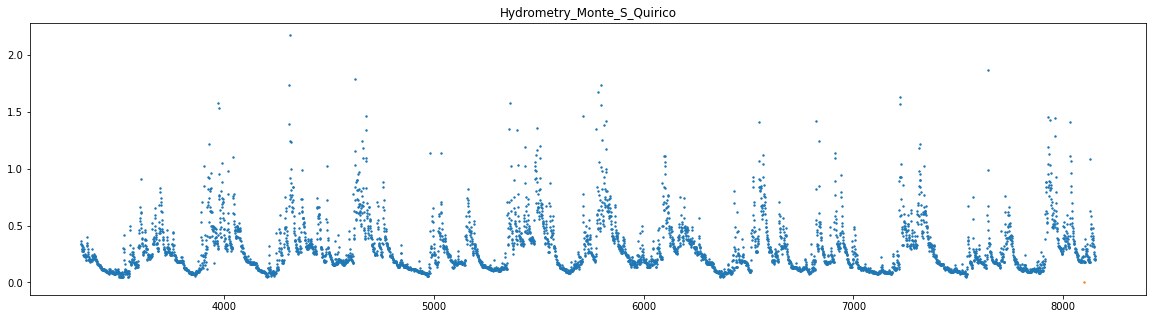

In [28]:
# check if they're actually using 0 for null
for c in ['Temperature_Ponte_a_Moriano', 'Volume_POL', 'Volume_CSA', 'Volume_CSAL', 'Hydrometry_Monte_S_Quirico']:
    fig, ax = plt.subplots(1, 1, figsize=(20,5))
    iszero = df5[c] == 0
    ax.scatter(df5[iszero].index, df5[iszero][c].abs(), c='C1', s=2)
    ax.scatter(df5[~iszero].index, df5[~iszero][c].abs(), c='C0', s=2)
    ax.set_title(c)
    plt.show()

In [29]:
# the temperature feature can just be dropped, too many nulls;
# ditto for the two volume features (Volume_POL appears to have
# lots of leading nulls, but its scale is just out of wack yo)